In [32]:
import pandas as pd
from sklearn.isotonic import IsotonicRegression

df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])[['CO2_kg_per_Ha', 'Yield_kg_per_Ha']]

ir = IsotonicRegression() # create an instance of the IsotonicRegression class
  
y_ir = ir.fit_transform(df['CO2_kg_per_Ha'], df['Yield_kg_per_Ha']) # fit the model and transform the data

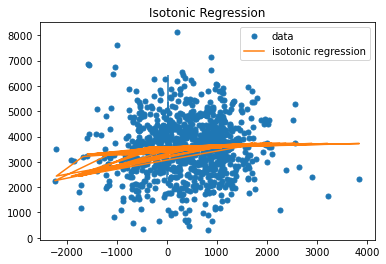

In [33]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
n = 20
lines=[[[i,df['Yield_kg_per_Ha'][i]],[i,y_ir[i]]] for i in range(n)]
  
# Line to measure the difference between actual and target value
lc=LineCollection(lines)

plt.plot(df['CO2_kg_per_Ha'],df['Yield_kg_per_Ha'],'.',markersize=10, label='data')
plt.plot(df['CO2_kg_per_Ha'],y_ir,'-',markersize=10,label='isotonic regression' )
  
plt.gca().add_collection(lc)
plt.legend() # add a legend
  
plt.title("Isotonic Regression")
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

In [65]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

(array([ 12.,  25.,  81., 156., 182., 154.,  85.,  33.,   6.,   2.]),
 array([-2.92079334, -2.28170707, -1.6426208 , -1.00353453, -0.36444827,
         0.274638  ,  0.91372427,  1.55281054,  2.1918968 ,  2.83098307,
         3.47006934]),
 <BarContainer object of 10 artists>)

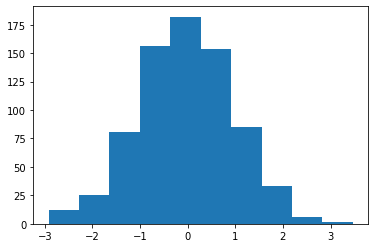

In [44]:
###############
### BUILD 1 ###
###############

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])[['Yield_kg_per_Ha', 'CO2_kg_per_Ha']]

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

In [45]:
ir = IsotonicRegression() # create an instance of the IsotonicRegression class
  
# Fit isotonic regression model

data_dict = {'CO2': X_train_Yield_kg_per_ha[:,0], 'Yield': y_train_Yield_kg_per_ha[:,0]}

temp_df = pd.DataFrame.from_dict(data_dict)

ir = IsotonicRegression() # create an instance of the IsotonicRegression class
  
y_ir = ir.fit_transform(temp_df['CO2'], temp_df['Yield']) # fit the model and transform the data

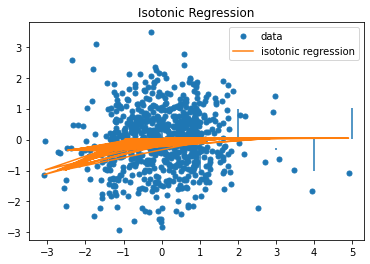

In [46]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
n = 20
lines=[[[i,temp_df['Yield'][i]],[i,y_ir[i]]] for i in range(n)]
  
# Line to measure the difference between actual and target value
lc=LineCollection(lines)
  
plt.plot(temp_df['CO2'],temp_df['Yield'],'.',markersize=10, label='data')
plt.plot(temp_df['CO2'],y_ir,'-',markersize=10,label='isotonic regression' )
  
plt.gca().add_collection(lc)
plt.legend() # add a legend
  
plt.title("Isotonic Regression")
plt.show()

In [47]:
temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit(temp_df['CO2'], temp_df['Yield']) # fit the model and transform the data

inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_ir.predict(X_test_Yield_kg_per_ha[:,0]).reshape(-1,1)))                                             
print(mae(inv_transform_y_actuals, inv_transformed_preds))

849.3398042822591


(array([ 12.,  29.,  91., 150., 169., 147.,  70.,  21.,   5.,   2.]),
 array([-2.86427818, -2.21577977, -1.56728136, -0.91878294, -0.27028453,
         0.37821388,  1.0267123 ,  1.67521071,  2.32370912,  2.97220754,
         3.62070595]),
 <BarContainer object of 10 artists>)

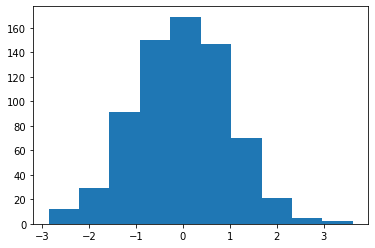

In [41]:
#Subsetting by nitrate

###############
### BUILD 1 ###
###############

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])[df['N_as_Nitrate_kg_per_Ha'] < 125]
df = df[['Yield_kg_per_Ha', 'CO2_kg_per_Ha']]

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

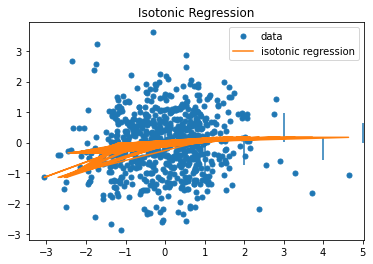

In [42]:
ir = IsotonicRegression() # create an instance of the IsotonicRegression class
  
# Fit isotonic regression model

data_dict = {'CO2': X_train_Yield_kg_per_ha[:,0], 'Yield': y_train_Yield_kg_per_ha[:,0]}

temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit_transform(temp_df['CO2'], temp_df['Yield']) # fit the model and transform the data

n = 20
lines=[[[i,temp_df['Yield'][i]],[i,y_ir[i]]] for i in range(n)]
  
# Line to measure the difference between actual and target value
lc=LineCollection(lines)
  
# plt.figure(figsize=(10,4))
plt.plot(temp_df['CO2'],temp_df['Yield'],'.',markersize=10, label='data')
plt.plot(temp_df['CO2'],y_ir,'-',markersize=10,label='isotonic regression' )
  
plt.gca().add_collection(lc)
plt.legend() # add a legend
  
plt.title("Isotonic Regression")
plt.show()

In [43]:
temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit(temp_df['CO2'], temp_df['Yield']) # fit the model and transform the data

inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_ir.predict(X_test_Yield_kg_per_ha[:,0]).reshape(-1,1)))                                             
print(mae(inv_transform_y_actuals, inv_transformed_preds))

846.9100027402211


In [74]:
#Subsetting by water

###############
### BUILD 1 ###
###############

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])[df['Total_Water_Applied_mm'] == 350]
df = df[['Yield_kg_per_Ha', 'CO2_kg_per_Ha']]

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

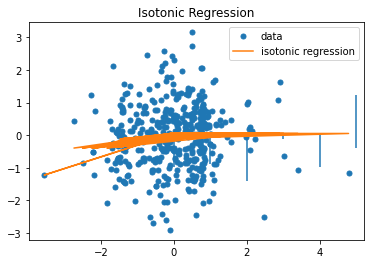

In [75]:
ir = IsotonicRegression() # create an instance of the IsotonicRegression class
  
# Fit isotonic regression model

data_dict = {'CO2': X_train_Yield_kg_per_ha[:,0], 'Yield': y_train_Yield_kg_per_ha[:,0]}

temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit_transform(temp_df['CO2'], temp_df['Yield']) # fit the model and transform the data

n = 20
lines=[[[i,temp_df['Yield'][i]],[i,y_ir[i]]] for i in range(n)]
  
# Line to measure the difference between actual and target value
lc=LineCollection(lines)
  
# plt.figure(figsize=(10,4))
plt.plot(temp_df['CO2'],temp_df['Yield'],'.',markersize=10, label='data')
plt.plot(temp_df['CO2'],y_ir,'-',markersize=10,label='isotonic regression' )
  
plt.gca().add_collection(lc)
plt.legend() # add a legend
  
plt.title("Isotonic Regression")
plt.show()

In [77]:
temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit(temp_df['CO2'], temp_df['Yield']) # fit the model and transform the data

inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_ir.predict(X_test_Yield_kg_per_ha[:,0]).reshape(-1,1)))
print(mae(inv_transform_y_actuals, inv_transformed_preds))

748.8836847793941


In [53]:
#Subsetting by crop protection

###############
### BUILD 1 ###
###############

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])[df['Crop_Protection_Application_Doses'] < 30]
df = df[['Yield_kg_per_Ha', 'CO2_kg_per_Ha']]

#train/test split
train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

#y_values
y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

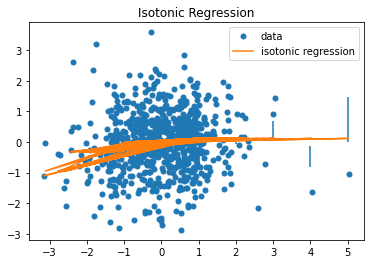

In [54]:
ir = IsotonicRegression() # create an instance of the IsotonicRegression class
  
# Fit isotonic regression model

data_dict = {'CO2': X_train_Yield_kg_per_ha[:,0], 'Yield': y_train_Yield_kg_per_ha[:,0]}

temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit_transform(temp_df['CO2'], temp_df['Yield']) # fit the model and transform the data

n = 20
lines=[[[i,temp_df['Yield'][i]],[i,y_ir[i]]] for i in range(n)]
  
# Line to measure the difference between actual and target value
lc=LineCollection(lines)
  
# plt.figure(figsize=(10,4))
plt.plot(temp_df['CO2'],temp_df['Yield'],'.',markersize=10, label='data')
plt.plot(temp_df['CO2'],y_ir,'-',markersize=10,label='isotonic regression' )
  
plt.gca().add_collection(lc)
plt.legend() # add a legend
  
plt.title("Isotonic Regression")
plt.show()

In [55]:
temp_df = pd.DataFrame.from_dict(data_dict)

y_ir = ir.fit(temp_df['CO2'], temp_df['Yield']) # fit the model and transform the data

inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_ir.predict(X_test_Yield_kg_per_ha[:,0]).reshape(-1,1)))                                             
print(mae(inv_transform_y_actuals, inv_transformed_preds))

849.4316939973509


In [ ]:
import math
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create histogram to visualize values in dataset
plt.hist(lognorm_dataset, edgecolor='black', bins=20)

In [ ]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(lognorm_dataset, line='45')

plt.show()

In [ ]:
import math
import numpy as np
from scipy.stats import shapiro 
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#perform Shapiro-Wilk test for normality
shapiro(lognorm_dataset)

In [23]:
import math
import numpy as np
from scipy.stats import kstest
from scipy.stats import lognorm

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values

#perform Kolmogorov-Smirnov test for normality
# kstest(X_train_Yield_kg_per_ha[:,0], 'norm')
# kstest(X_train_Yield_kg_per_ha[:,1], 'norm')
# kstest(X_train_Yield_kg_per_ha[:,2], 'norm')
# kstest(X_train_Yield_kg_per_ha[:,3], 'norm')
# kstest(X_train_Yield_kg_per_ha[:,4], 'norm')
# kstest(X_train_Yield_kg_per_ha[:,5], 'norm')
# kstest(X_train_Yield_kg_per_ha[:,6], 'norm')
# kstest(X_train_Yield_kg_per_ha[:,7], 'norm')
# kstest(X_train_Yield_kg_per_ha[:,8], 'norm')

[ 6.12373792  2.00195018  2.08738925  1.5896529   4.19001291  0.86004605
  6.50392527  1.85780661  3.18840103  2.39963061  5.64660211  0.97037726
  2.3135691   2.24335569  4.79169744  1.56839745  2.49374575  1.75254811
  2.77626604  3.63790369  1.56782673  4.81801422  4.26650658  3.49469872
  4.26493941  1.93118938  2.55628463  1.70252983  2.37751532  3.54372252
  1.92354459  2.22915644  1.92786592  1.78139574  1.94327935  2.70112324
  1.55479674  3.0563086   6.23327009  3.939375    2.46966428  1.74400731
  1.87090235  6.33587104  2.78822133  1.97684507  2.99055127  7.76889211
  2.8866004   3.70099445  3.15846187  2.27931527  1.53532318  2.2826308
  2.44868925  3.64483682  4.1350181   4.32992855  3.13551571  4.23155942
  1.86414225  5.08570711  3.51298081  2.34187896  3.47036256  2.61748555
  4.78657294  5.81190505  8.10748495  1.35222561  1.32041106  2.11227817
  2.94473413  4.21261865  3.18297875  0.98896078  2.3324005   4.1123199
  3.04971263  3.97890076  2.43229664  2.45867101  2.9